 #Ch03 - Decision Tree

In [3]:
import os
srcDir = "C:\Users\suh\Desktop\machinelearninginaction"
ch3dd = os.path.join(srcDir, 'Ch03')
%cd {ch3dd}

C:\Users\suh\Desktop\machinelearninginaction\Ch03


In [6]:
import trees
import treePlotter

def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    #change to discrete values
    return dataSet, labels


myDat, labels = trees.createDataSet()

myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [7]:
# 데이터 집합의 섀넌 엔트로피를 계산하는 함수
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet: #the the number of unique elements and their occurance
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) #log base 2
    return shannonEnt


reload(trees)
myDat, labels = trees.createDataSet()

#myDat[0][-1] = 'maybe'

trees.calcShannonEnt(myDat)

0.9709505944546686

In [8]:
# 주어진 속성으로 데이터 집합을 분할하는 함수
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


reload(trees)
myDat, labels = trees.createDataSet()

myDat

trees.splitDataSet(myDat, 0, 1)

trees.splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no']]

In [9]:
# 데이터 분할 시 가장 좋은 속성을 선택하는 함수
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)     
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return bestFeature                      #returns an integer


reload(trees)
myDay, labels = trees.createDataSet()
trees.chooseBestFeatureToSplit(myDat)

myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [10]:
# 발생 빈도가 가장 큰 분류 항목을 반환하는 함수
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


# 트리 생성하는 함수
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]#stop splitting when all of the classes are equal
    if len(dataSet[0]) == 1: #stop splitting when there are no more features in dataSet
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree       


reload(trees)
myDay, labels = trees.createDataSet()
myTree = trees.createTree(myDat, labels)

myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

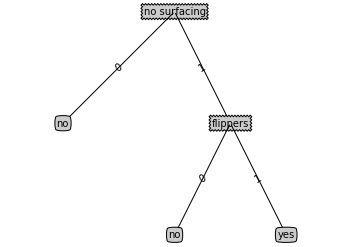

In [12]:
%matplotlib inline
treePlotter.createPlot(myTree)

In [13]:
# 트리에 있는 노드의 개수를 확인하는 함수
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

# 트리의 깊이 확인하는 함수
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]


reload(treePlotter)

treePlotter.retrieveTree(1)

myTree = treePlotter.retrieveTree(0)
treePlotter.getNumLeafs(myTree)
treePlotter.getTreeDepth(myTree)

2

In [14]:
# 의사결정 트리 분류기 함수
def classify(inputTree,featLabels,testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

myDat, labels = trees.createDataSet()
labels

myTree = treePlotter.retrieveTree(0)
myTree

trees.classify(myTree, labels, [1,0])

trees.classify(myTree, labels, [1,1])

'yes'

In [15]:
# pickle을 이용해 의사결정 트리를 유지시키는 함수
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

trees.storeTree(myTree, 'classifierStorage.txt')
trees.grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

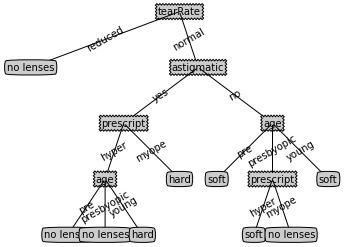

In [16]:
############################## testcase_#1 ##############################
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = trees.createTree(lenses, lensesLabels)

lensesTree

%matplotlib inline
treePlotter.createPlot(lensesTree)

#실습

In [29]:
import math

dataSet = [[1, 1, 'yes'],
           [1, 1, 'yes'],
           [1, 0, 'no'],
           [0, 1, 'no'],
           [0, 1, 'no']]
labels = ['no surfacing','flippers']

numEntries = len(dataSet)

labelCounts = {}

for featVec in dataSet:
    currentLabel = featVec[-1]
    if currentLabel not in labelCounts.keys():
        labelCounts[currentLabel] = 0
    labelCounts[currentLabel] += 1
    
shannonEnt = 0.0
for key in labelCounts:
    prob = float(labelCounts[key]) / numEntries
    shannonEnt -= prob * math.log(prob, 2)
    
print shannonEnt

'''
axis = 0
value = 1
retDataSet = []
for featVec in dataSet:
    if featVec[axis] == value:
        reducedFeatVec = 
'''

# 새로 자신만의 트리 만들어오기

0.9709505944546686